# AUGMENTATION NOTEBOOK

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import albumentations as A
import cv2

from PIL import Image

In [2]:
PATH_TO_CSV = "ref1_merged_with_crops.csv"

df_ref = pd.read_csv(PATH_TO_CSV)

In [3]:
df_ref

,image_id,bbox,category_id,width,height,file_name,category_name,crop_file_name
0,4,"[665, 448, 206, 174]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine,cropped_0.png
1,4,"[475, 186, 236, 186]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine,cropped_1.png
2,4,"[962, 76, 229, 217]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine,cropped_2.png
3,4,"[778, 250, 163, 135]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine,cropped_3.png
4,4,"[184, 377, 244, 194]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine,cropped_4.png
...,...,...,...,...,...,...,...,...
139,67,"[388, 443, 238, 186]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables,cropped_139.png
140,67,"[791, 129, 277, 139]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables,cropped_140.png
141,67,"[345, 139, 271, 109]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables,cropped_141.png
142,67,"[895, 365, 177, 223]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables,cropped_142.png


In [89]:
#df_ref['images__file_name'] = df_ref['images__file_name'].fillna(0)

In [90]:
#df_ref

,images__id,images__width,images__height,images__file_name,annotations__id,annotations__image_id,annotations__bbox__001,annotations__bbox__002,annotations__bbox__003,annotations__bbox__004,annotations__category_id,categories__id,categories__name
0,4.0,1280.0,720.0,nomagic_mulled_wine_3.png,12,4,665,448,206,174,8,1.0,nomagic_brush
1,5.0,1280.0,720.0,nomagic_samsung_1.png,13,4,475,186,236,186,8,2.0,nomagic_roller
2,6.0,1280.0,720.0,nomagic_brush_2.png,14,4,962,76,229,217,8,3.0,nomagic_digitec_cables
3,7.0,1280.0,720.0,nomagic_cat_eye_1.png,15,4,778,250,163,135,8,4.0,nomagic_boxers
4,9.0,1280.0,720.0,nomagic_cat_eye_2.png,16,4,184,377,244,194,8,5.0,nomagic_papiloty
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,NaN,NaN,0,277,67,791,129,277,139,3,NaN,NaN
140,NaN,NaN,NaN,0,278,67,345,139,271,109,3,NaN,NaN
141,NaN,NaN,NaN,0,279,67,895,365,177,223,3,NaN,NaN
142,NaN,NaN,NaN,0,280,67,155,146,163,209,3,NaN,NaN


In [21]:

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=512, height=512+25),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("nomagic_boxers_1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

In [22]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

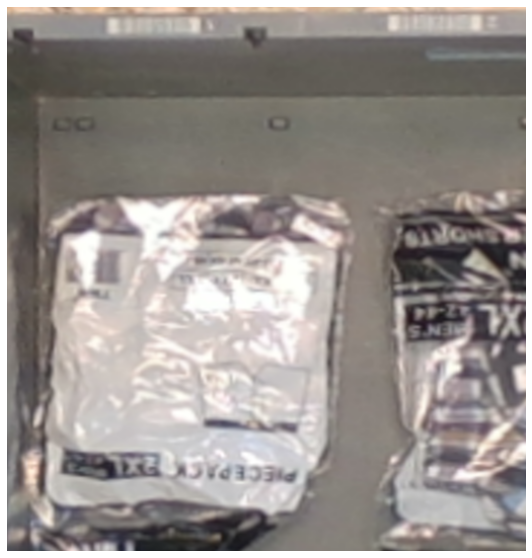

In [23]:
visualize(transformed_image)

In [ ]:
  """
        A.Resize(height=224, width=224),
        A.Rotate(p=0.5),
        A.Transpose(p=0.5),
        #A.OpticalDistortion(p=0.5),
        A.Lambda(p=0.5),
        #A.Downscale(p=1),
        #A.ChannelDropout(p=0.5),
        A.Blur(blur_limit=7, p=0.5),
        #A.RandomSunFlare(p=0.2),
    """

In [97]:
def display_image_grid(dataframe, cols=2):
    
    # Augmentation transformation  
    transform_Gauss = A.Compose([   
        A.Resize(height=224, width=224),
        A.Rotate(p=0.5),
        A.Transpose(p=0.5),
        A.OpticalDistortion(p=1),
        A.Lambda(p=0.5),
        A.Blur(blur_limit=7, p=0.5),
        #A.Perspective(p=1)
    ])
    
    num = 0 
    rows = 2*(len(dataframe) // cols)
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i, image_filepath in dataframe.iterrows():
        
        num+=1
        #print(f"i is {i}")
        #print(f"image_filepath is {image_filepath.images__file_name}")
        #print(f"{type(image_filepath.images__file_name)}")
        #if image_filepath.images__file_name == 0:
        #    continue
       
        image_filepath = os.path.join("cropped_ref", image_filepath.crop_file_name)
       
        image = cv2.imread(image_filepath)
    
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        transformed = transform_Gauss(image=image)
        transformed_image = transformed["image"]
        """
        true_label = os.path.normpath(image_filepath).split(os.sep)[-2]
        predicted_label = predicted_labels[i] if predicted_labels else true_label
        color = "green" if true_label == predicted_label else "red"
        """
        ax.ravel()[i].imshow(transformed_image)
        ax.ravel()[i].set_title("Transformed")
        ax.ravel()[i].set_axis_off()
        transformed_image = Image.fromarray(transformed_image, 'RGB')
        print(image_filepath[12:])
        transformed_image.save(os.path.join("CROPPED_AUG", image_filepath[12:]), "PNG")
        
    for i, image_filepath in dataframe.iterrows():
        image_filepath = os.path.join("cropped_ref", image_filepath.crop_file_name)
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.ravel()[i+num].imshow(image)
        ax.ravel()[i+num].set_title("original")
        ax.ravel()[i+num].set_axis_off()
        
    plt.tight_layout()
    plt.show()

cropped_0.png
cropped_1.png
cropped_2.png
cropped_3.png
cropped_4.png
cropped_5.png
cropped_6.png
cropped_7.png
cropped_8.png
cropped_9.png


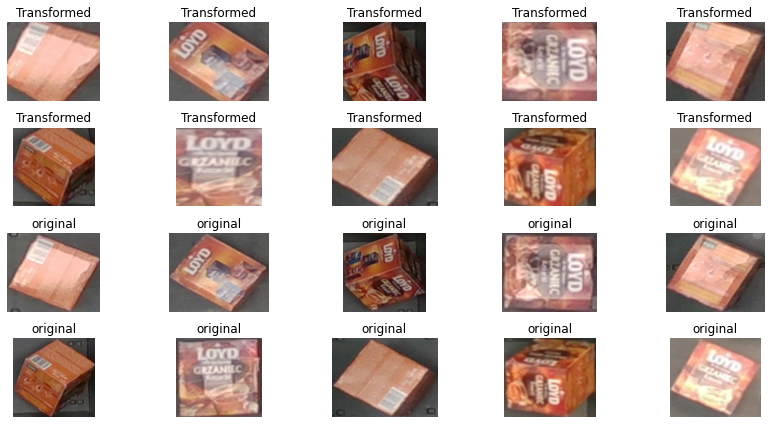

In [98]:
display_image_grid(df_ref[:10], cols=5)